In [1]:
import pandas as pd
import numpy as np

In [2]:
import chardet

with open("spam.csv", "rb") as f:
    result = chardet.detect(f.read())

data = pd.read_csv("spam.csv", encoding=result["encoding"])
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## 1. Data Cleaning

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
# Drop last 3 cols
data.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
# Renaming the cols
data.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
data.sample(5)

,target,text
4672,ham,I forgot 2 ask Ì_ all smth.. There's a card on...
417,spam,FREE entry into our å£250 weekly competition j...
1401,ham,Kaiez... Enjoy ur tuition... Gee... Thk e seco...
716,spam,+449071512431 URGENT! This is the 2nd attempt ...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [7]:
data['target'] = encoder.fit_transform(data['target'])
data.sample(5)

,target,text
3146,0,Oh thats late! Well have a good night and i wi...
1770,0,Dont show yourself. How far. Put new pictures ...
1277,0,Dont put your phone on silent mode ok
330,0,K.k:)apo k.good movie.
2503,0,Fwiw the reason I'm only around when it's time...


In [8]:
# missing values
data.isnull().sum()

target    0
text      0
dtype: int64

In [9]:
# duplicated values
data.duplicated().sum()

403

In [10]:
# remove duplicates
data = data.drop_duplicates(keep="first")


In [11]:
data.duplicated().sum()

0

In [12]:
data.shape

(5169, 2)

## 2. EDA

In [13]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

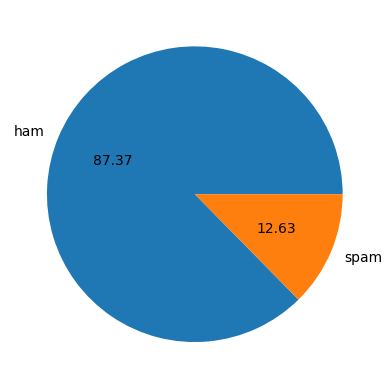

In [14]:
import matplotlib.pyplot as plt

plt.pie(data['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [15]:
import nltk

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Snimarpal
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
data['num_characters'] = data['text'].apply(len)
data

C:\Users\Snimarpal Singh\AppData\Local\Temp\ipykernel_19512\624110848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_characters'] = data['text'].apply(len)


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [18]:
# number of words
data['num_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))
data

C:\Users\Snimarpal Singh\AppData\Local\Temp\ipykernel_19512\1096100509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [19]:
# number of sentences
data['num_sentences'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
data

C:\Users\Snimarpal Singh\AppData\Local\Temp\ipykernel_19512\1559830184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_sentences'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [20]:
data[["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
# ham messages description
data[data['target'] == 0][["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
# spam messages description
data[data['target'] == 1][["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [23]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

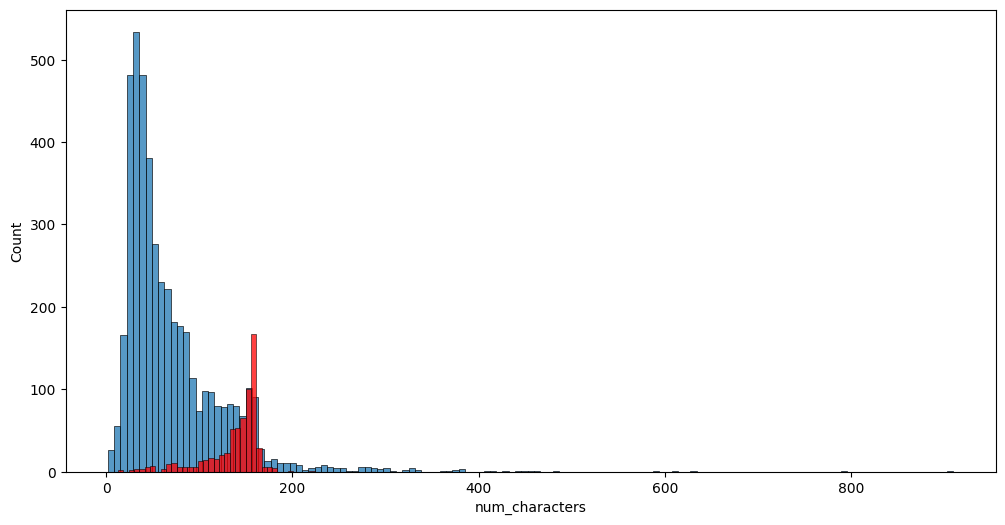

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(data[data['target'] == 0]["num_characters"])
sns.histplot(data[data['target'] == 1]["num_characters"], color="red")

<Axes: xlabel='num_words', ylabel='Count'>

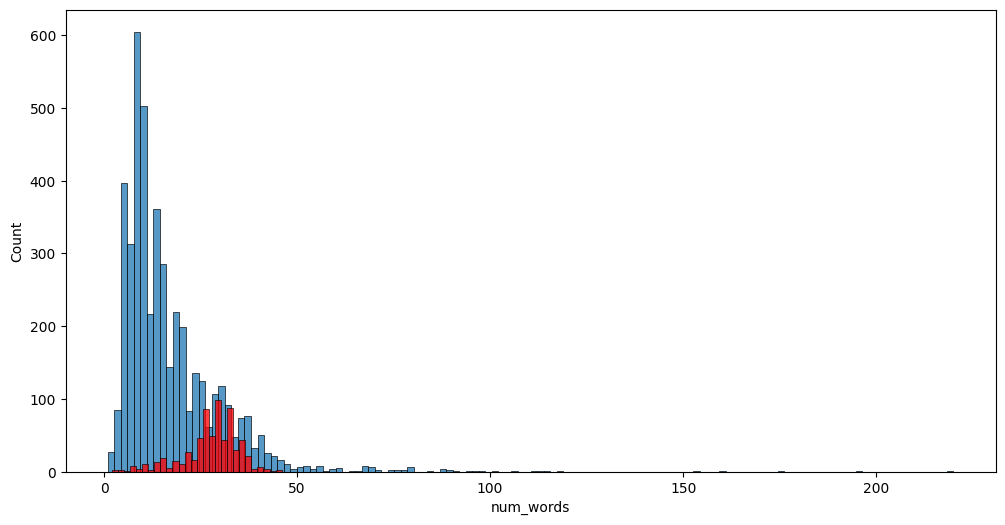

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(data[data['target'] == 0]["num_words"])
sns.histplot(data[data['target'] == 1]["num_words"], color="red")

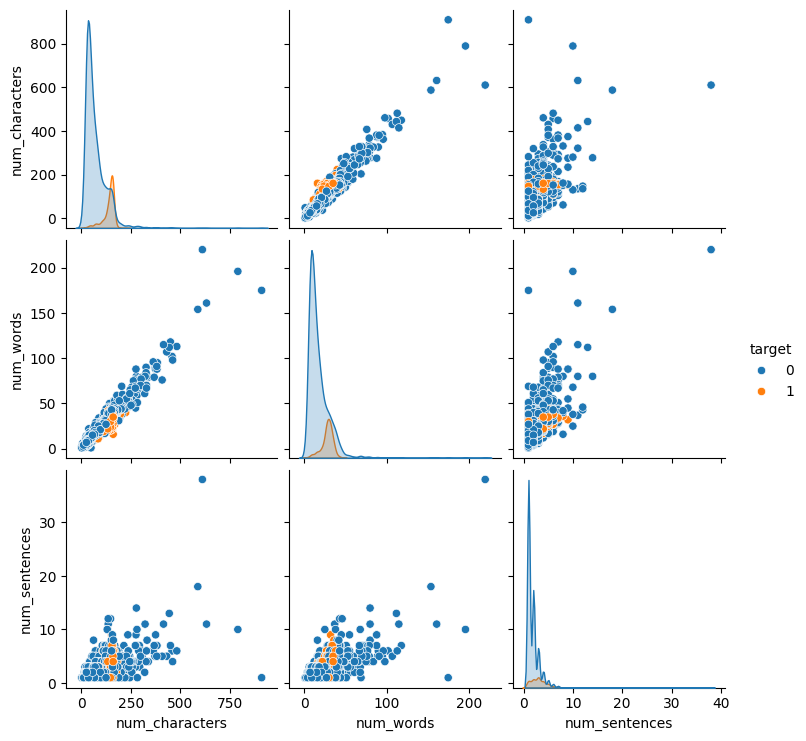

In [26]:
sns.pairplot(data, hue="target")

<Axes: >

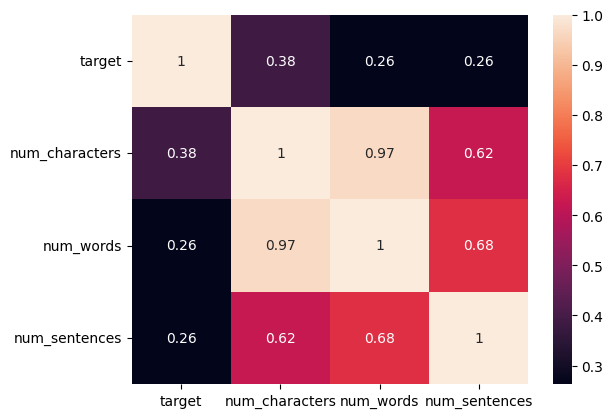

In [27]:
sns.heatmap(data.corr(numeric_only=True), annot=True)

## 3. Data preprocessing
1. Lower case
2. Tokenization
3. Removing special char (is, of, the)
4. Removing stop words and puntuation
5. Stemming (dance, dancing, dances = dance)

In [28]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\Snimarpal
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def transform_text(text):
    # lowercase
    text = text.lower()

    # tokenize
    text = nltk.word_tokenize(text)

    # removing special chars(%, etc)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()

    # removing stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    # stemming
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [30]:
data['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [31]:
transform_text(data['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [32]:
data["transformed_text"] = data['text'].apply(transform_text)
data.head()

C:\Users\Snimarpal Singh\AppData\Local\Temp\ipykernel_19512\3811093951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["transformed_text"] = data['text'].apply(transform_text)


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [33]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

In [34]:
spam_wc = wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=" "))

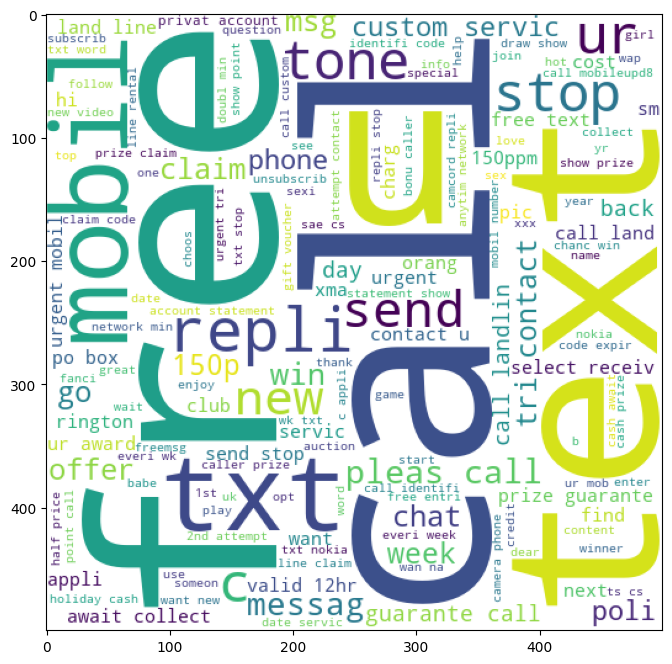

In [35]:
plt.figure(figsize=(15, 8))
plt.imshow(spam_wc)

In [36]:
ham_wc = wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=" "))

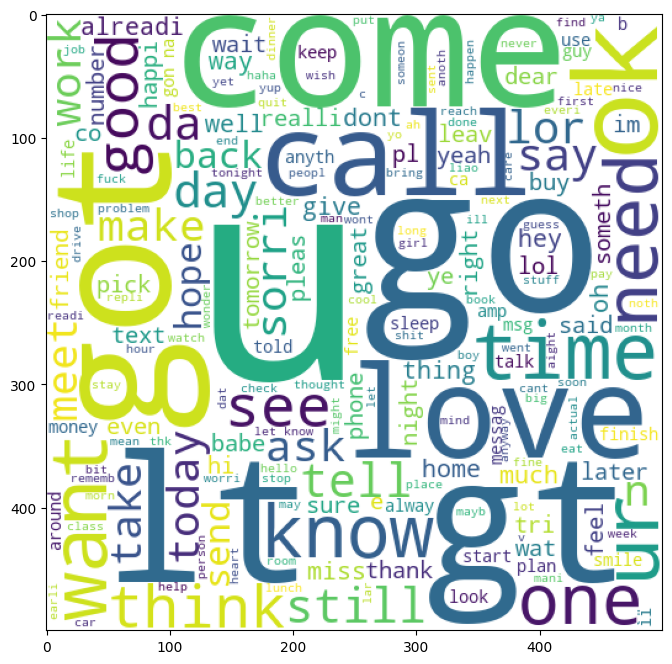

In [37]:
plt.figure(figsize=(15, 8))
plt.imshow(ham_wc)

In [38]:
spam_corpus = []
for msg in data[data['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [39]:
len(spam_corpus)

9939

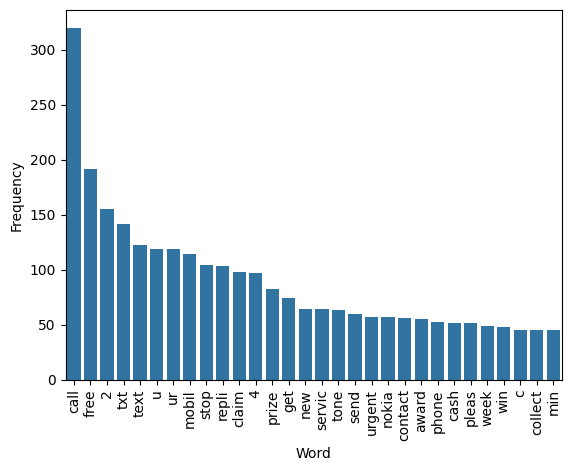

In [40]:
from collections import Counter

spam_counts = Counter(spam_corpus).most_common(30)
df = pd.DataFrame(spam_counts, columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=df)
plt.xticks(rotation='vertical')
plt.show()

In [41]:
ham_corpus = []
for msg in data[data['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [42]:
len(ham_corpus)

35404

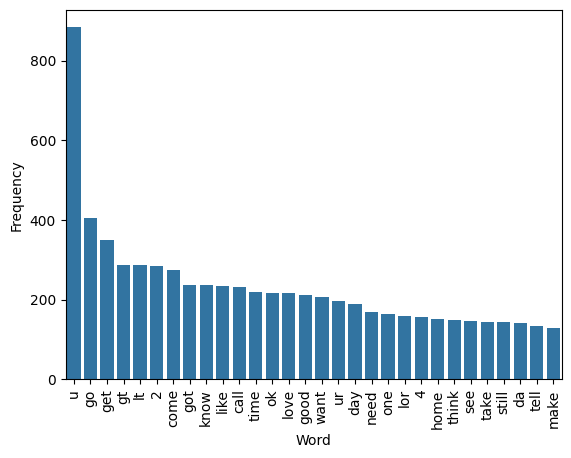

In [43]:
from collections import Counter

ham_counts = Counter(ham_corpus).most_common(30)
df = pd.DataFrame(ham_counts, columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=df)
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [44]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [45]:
X = tfidf.fit_transform(data["transformed_text"]).toarray()
X.shape

(5169, 6708)

In [46]:
y = data['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [49]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [50]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [51]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [52]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [53]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [54]:
# tfidf --> mnb

### Comparing MultinomialNB with other models

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [56]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [57]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [58]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [59]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [60]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.9593810444874274, 1.0)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

## Model Improvement

### 1. Change the max_features parameter of TfIdf to 3000

In [61]:
tfidf = TfidfVectorizer(max_features=3000)

In [62]:
X = tfidf.fit_transform(data["transformed_text"]).toarray()
X.shape

(5169, 3000)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [64]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.9709864603481625, 1.0)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df

### 2. Scale the input col (Sometimes reduces precision)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
# accuracy_scores = []
# precision_scores = []

# for name,clf in clfs.items():
    
#     current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)
    
#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

In [ ]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
# temp_df

In [ ]:
# new_df_scaled = new_df.merge(temp_df, on="Algorithm")
# new_df_scaled

### 3. Ensemble Learning (Reduces precision)

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [ ]:
# voting
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('rf', rfc)],voting='soft')

In [ ]:
voting.fit(X_train, y_train)

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
# stacking
estimators=[('svm', svc), ('nb', mnb), ('rf', rfc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [66]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))